<a href="https://colab.research.google.com/github/tlysenko/ML-notebooks/blob/master/Breast_cancer_classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler


import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Load and split the data

In [ ]:
data = load_breast_cancer()

In [ ]:
y = data['target']
X = data['data']

print(y.shape, X.shape)

(569,) (569, 30)


#### Target variable distribution


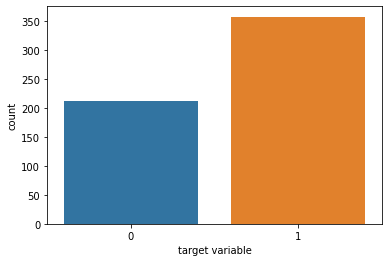

In [ ]:
ax = sns.countplot(x = y);
ax.set(xlabel='target variable', ylabel='count');

#### Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9999, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

(57, 30) (57, 30) (57,) (57,)


In [ ]:
X_train.shape

(455, 30)

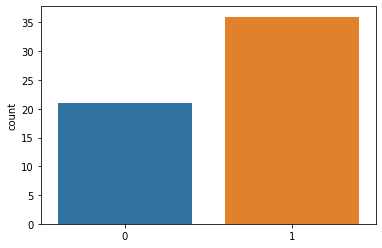

In [ ]:
ax = sns.countplot(x = y_test);


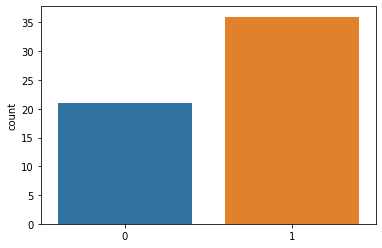

In [ ]:
ax = sns.countplot(x = y_val);


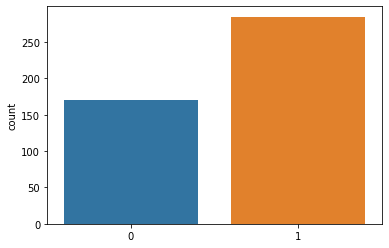

In [ ]:
ax = sns.countplot(x = y_train);


##### Scale the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Bulding and training the model

In [ ]:
N, D = X_train.shape 
print(N,D)

455 30


In [ ]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Input(shape=(D,)),
                              tf.keras.layers.Dense(units = 1,
                                                    activation='sigmoid')
                            ])

model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics = ['accuracy'])

In [ ]:
model1.fit(x = X_train,
           y = y_train,
           epochs = 1000, 
           verbose = 0,
           validation_data = (X_val, y_val),
         
)

### Evaluating the model

In [ ]:
print("Train score:", model1.evaluate(X_train, y_train)) # evaluate returns loss and accuracy

15/15 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9912
Train score: [0.04056718945503235, 0.9912087917327881]


In [ ]:
prediction = model1.predict(X_test)
prediction = [np.round(x,0) for x in prediction]

confusion_matrix(y_test, prediction)

array([[20,  1],
       [ 3, 33]])